In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
df=pd.read_csv('Algerian_cleaned.csv')

In [6]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [16]:
df.drop(['month','year','day'],axis=1,inplace=True)

df.head()

In [20]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [22]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [24]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

## dependent and independent feattures

In [27]:
X=df.drop("FWI",axis=1)
y=df['FWI']

In [29]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [31]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

### train test split

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=32)

In [38]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [40]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.649626,-0.314438,-0.283837,0.665458,0.459014,0.335644,0.606817,0.428699,0.521870,0.269884
RH,-0.649626,1.000000,0.260339,0.203796,-0.629986,-0.372883,-0.177685,-0.690943,-0.312756,-0.470321,-0.435097
Ws,-0.314438,0.260339,1.000000,0.127195,-0.190887,0.001977,0.105629,-0.012646,0.045139,-0.096450,-0.224424
Rain,-0.283837,0.203796,0.127195,1.000000,-0.526085,-0.281613,-0.286583,-0.343455,-0.292000,-0.362419,-0.024956
FFMC,0.665458,-0.629986,-0.190887,-0.526085,1.000000,0.609895,0.490056,0.754823,0.593281,0.782715,0.234913
DMC,0.459014,-0.372883,0.001977,-0.281613,0.609895,1.000000,0.866489,0.676315,0.979810,0.588497,0.155872
DC,0.335644,-0.177685,0.105629,-0.286583,0.490056,0.866489,1.000000,0.502855,0.937368,0.480962,-0.121136
ISI,0.606817,-0.690943,-0.012646,-0.343455,0.754823,0.676315,0.502855,1.000000,0.645061,0.750187,0.254088
BUI,0.428699,-0.312756,0.045139,-0.292000,0.593281,0.979810,0.937368,0.645061,1.000000,0.584381,0.047726
Classes,0.521870,-0.470321,-0.096450,-0.362419,0.782715,0.588497,0.480962,0.750187,0.584381,1.000000,0.163558


## check for multicollinearity


<Axes: >

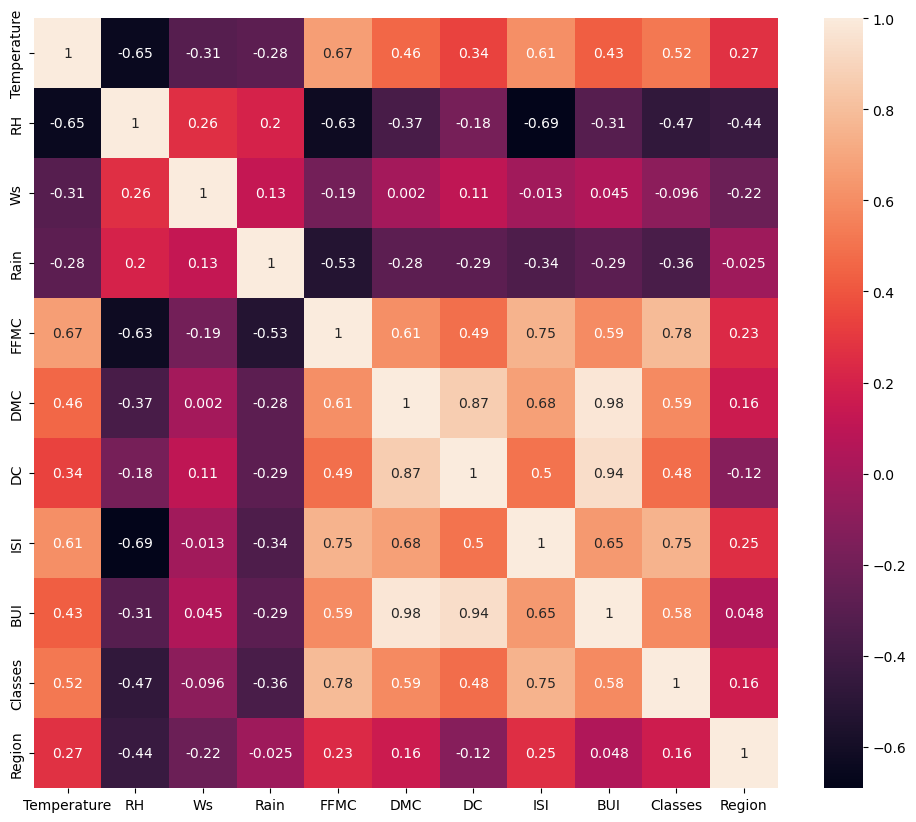

In [45]:
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [54]:
def correlation(datset, threshold):
    col_corr= set()
    corr_matrix= datset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j])> threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

## threshold domain expertise

In [59]:
corr_features=correlation(X_train, 0.85)

## drop features for correlation more than 0.85

In [62]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [64]:
X_train.shape, X_test.shape 

((182, 9), (61, 9))

## feature scaling or standardization

In [67]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [69]:
X_train_scaled

array([[-0.8824737 ,  1.81290518, -0.90550422, ..., -0.91526231,
        -1.19443152, -1.02222494],
       [ 0.19725883,  1.39709076,  1.92979501, ..., -0.12014183,
         0.83721836, -1.02222494],
       [-0.8824737 , -1.44430778, -2.67756623, ..., -0.54254959,
         0.83721836,  0.97825827],
       ...,
       [-1.42233997, -0.26616692,  0.5121454 , ...,  0.94830132,
         0.83721836,  0.97825827],
       [ 0.46719196, -0.05825971, -0.90550422, ..., -0.86556728,
        -1.19443152, -1.02222494],
       [-1.15240683,  0.91197393,  0.15773299, ..., -0.3934645 ,
         0.83721836,  0.97825827]])

Text(0.5, 1.0, 'after feature scaling')

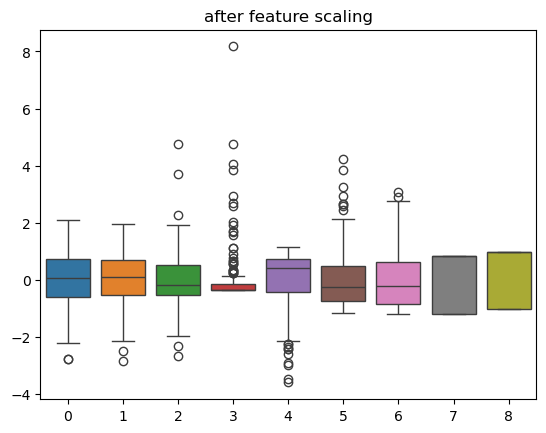

In [75]:
sns.boxplot(data=X_train_scaled)
plt.title("after feature scaling")

## Linear regreesion model

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error

In [82]:
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred= linreg.predict(X_test_scaled)

In [84]:
mae= mean_absolute_error(y_test,y_pred)
r2score=r2_score(y_test,y_pred)
print(mae,r2score)

0.7466279895327294 0.9345976867745527


In [139]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(linreg,open('ridge.pkl','wb'))

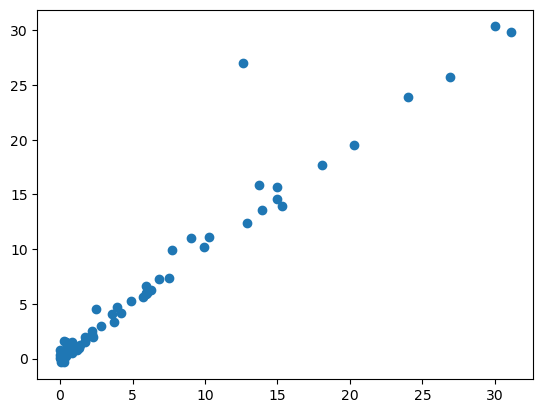

In [86]:
plt.scatter(y_test,y_pred)

## Lasso regression model

In [88]:
from sklearn.linear_model import Lasso
lasomodel=Lasso()
lasomodel.fit(X_train_scaled,y_train)
y_pred=lasomodel.predict(X_test_scaled)

In [90]:
mae= mean_absolute_error(y_test,y_pred)
r2score=r2_score(y_test,y_pred)
print(mae,r2score)

1.3793044556835745 0.9265734098553822


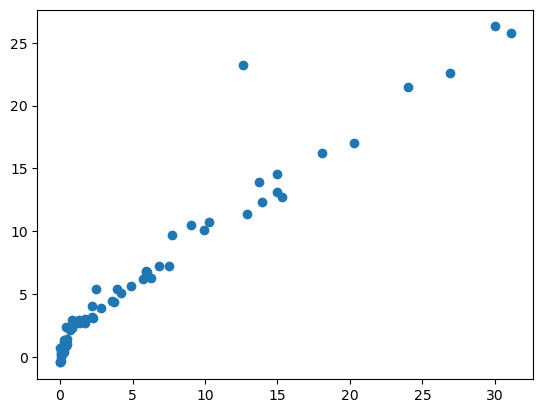

In [94]:
plt.scatter(y_test,y_pred)

## Ridge regression model

In [100]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)

In [102]:
mae= mean_absolute_error(y_test,y_pred)
r2score=r2_score(y_test,y_pred)
print(mae,r2score)

0.749255514727433 0.9363358872680736


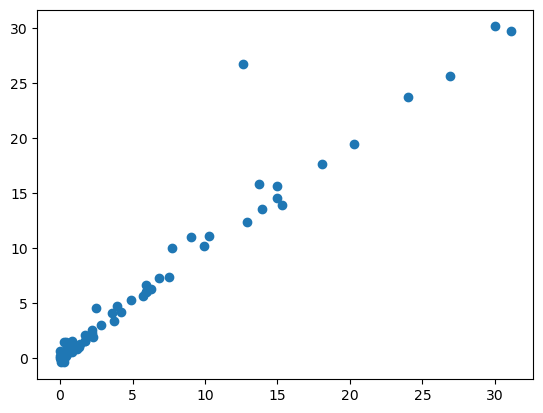

In [104]:
plt.scatter(y_test,y_pred)

## Elasticnet Regression model(combination of lasso and ridge)

In [112]:
from sklearn.linear_model import ElasticNet
elasticNet=ElasticNet()
elasticNet.fit(X_train_scaled,y_train)
y_pred=elasticNet.predict(X_test_scaled)


In [114]:
mae= mean_absolute_error(y_test,y_pred)
r2score=r2_score(y_test,y_pred)
print(mae,r2score)

1.956407369904247 0.882399092913726


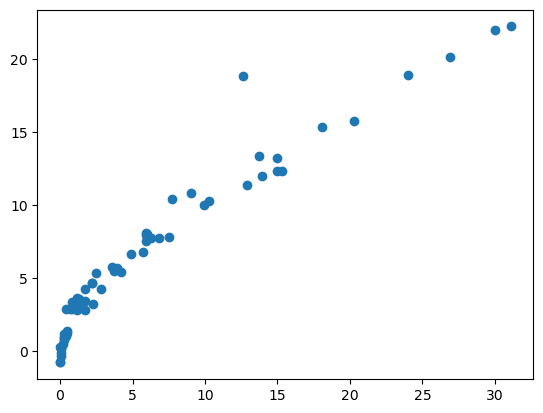

In [116]:
plt.scatter(y_test,y_pred)

## Cross validation Lasso

In [119]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)


LassoCV(cv=5)

In [121]:
lassocv.predict(X_test_scaled)

array([ 1.64673331,  3.05730136, 30.27085533, -0.30677333,  2.51271441,
       15.7878859 ,  6.61759674,  3.3559177 ,  7.32271012,  1.54080083,
       23.87764238,  5.94490051, 29.7659072 , -0.20549797,  1.02555752,
       17.70131584,  0.99939849, -0.37060489, 19.43688099,  5.61628418,
       -0.06221911,  0.88162522, 26.85083542,  0.68060514,  0.21210246,
        0.1985719 , 25.69203595, 15.64054663,  4.02459738,  1.13527361,
        4.27370617,  0.45800733,  4.56849954,  1.36473029,  6.01581218,
       11.07247448,  1.01626434,  9.90388207,  0.03834431,  2.36702559,
        0.61532293,  7.29143853, 13.91051095,  1.99147819,  1.63312691,
       -0.18817045, 13.59420815,  5.28349182, 10.95879932,  1.44035042,
       -0.05575529,  4.80021438,  6.2498704 ,  0.37066298,  1.5803073 ,
       10.23094374,  2.00721177, 14.51719851,  0.16051867, 12.36512913,
        5.98148509])

In [123]:
lassocv.alpha_

0.013664290796302148

In [125]:
lassocv.alphas_

array([6.80074973, 6.34240196, 5.91494529, 5.51629778, 5.14451777,
       4.79779449, 4.4744392 , 4.17287697, 3.89163903, 3.62935558,
       3.38474917, 3.1566284 , 2.94388221, 2.7454744 , 2.56043862,
       2.38787362, 2.22693893, 2.0768507 , 1.93687792, 1.80633883,
       1.68459764, 1.57106139, 1.46517711, 1.36642908, 1.27433633,
       1.18845033, 1.10835275, 1.03365349, 0.9639887 , 0.89901909,
       0.83842821, 0.78192096, 0.7292221 , 0.68007497, 0.6342402 ,
       0.59149453, 0.55162978, 0.51445178, 0.47977945, 0.44744392,
       0.4172877 , 0.3891639 , 0.36293556, 0.33847492, 0.31566284,
       0.29438822, 0.27454744, 0.25604386, 0.23878736, 0.22269389,
       0.20768507, 0.19368779, 0.18063388, 0.16845976, 0.15710614,
       0.14651771, 0.13664291, 0.12743363, 0.11884503, 0.11083528,
       0.10336535, 0.09639887, 0.08990191, 0.08384282, 0.0781921 ,
       0.07292221, 0.0680075 , 0.06342402, 0.05914945, 0.05516298,
       0.05144518, 0.04797794, 0.04474439, 0.04172877, 0.03891

In [133]:
y_pred=lassocv.predict(X_test_scaled)

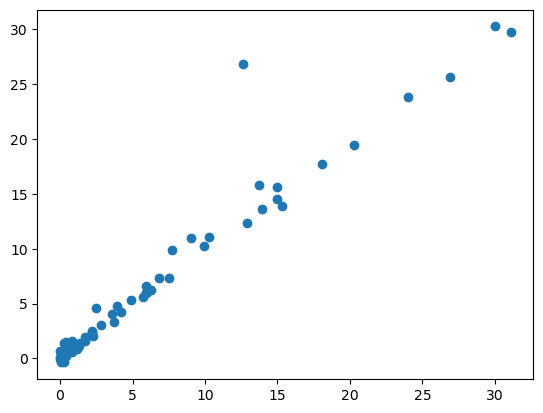

In [135]:
plt.scatter(y_test,y_pred)